## Recursos e bibliotecas

In [ ]:
# Instala o sqlalchemy
!pip install sqlalchemy

In [58]:
# Importa as bibliotecas do projeto
from sqlalchemy import create_engine # Conexão com o SQL Server
import pandas as pd # Manipulação de Dataframes
import numpy as np # Funções matemáticas
import matplotlib.pyplot as plt #Gráficos
import seaborn as sns #Gráficos
from sklearn.model_selection import train_test_split # Separação do modelo em base de treino e teste
from sklearn.linear_model import LinearRegression # Regressão linear
from sklearn.preprocessing import LabelEncoder # Pré-processamento de dados, varíaveis categóricas em contínuas
from sklearn.metrics import mean_absolute_error # Medida para avaliação do modelo, erro médio absoluto
from sklearn.metrics import mean_squared_error # Medida para avaliação do modelo, erro quadrático
import math
import warnings
warnings.filterwarnings('ignore')

## Configurando a conexão com nosso banco de dados

In [2]:
# Conectando com o Windows Authentication

try:
    Server = 'DESKTOP-9I30DAT'
    Database = 'ContosoRetailDW'
    Driver = 'ODBC Driver 17 for SQL Server'
    Database_con = f'mssql://@{Server}/{Database}?driver={Driver}'

    engine = create_engine(Database_con)
    conn = engine.connect()
    print("Conexão bem sucedida!")
except:
    print("Conexão falhou")

Conexão bem sucedida!


## Consulta para recuperação dos dados

In [3]:
# Consulta para pegarmos nossa base de dados do nosso banco
query = '''
        select 
                * 
        from vw_base_previsao 
        '''
df = pd.read_sql(query, conn)

#Mostrando as primeiras linhas da nossa base

display(df.head(5))

,ID da Venda,Data da Venda,Ano,Mês,Número do Mês,ID do Produto,Nome do Produto,Nome da Categoria,Nome da Subcategoria,Marca,Tamanho,Peso,Classe,Preço Unitário,Custo Unitário,Qtd. Vendida,Faturamento
0,1,02/01/2007,2007,January,1,956,A. Datum Point Shoot Digital Camera M500 Black,Cameras and camcorders,Digital Cameras,A. Datum,3.8 x 0.9 x 2.4,5.0,Regular,198.0,91.05,8,1584.0
1,2,12/02/2007,2007,February,2,766,Contoso Battery charger - bike E200 Black,Computers,Computers Accessories,Contoso,11 x 13 x 13,12.6,Economy,19.9,10.15,4,79.6
2,3,24/01/2008,2008,January,1,1175,Fabrikam Budget Moviemaker 2/3'' 17mm E100 White,Cameras and camcorders,Camcorders,Fabrikam,5 x 7.2 x 1.7,2.3,Regular,410.0,209.03,9,3690.0
3,4,13/01/2008,2008,January,1,1429,The Phone Company Touch Screen Phones 4-Wire/O...,Cell phones,Touch Screen Phones,The Phone Company,8 x 6 x 1,12.0,Regular,289.0,132.90,8,2312.0
4,5,22/01/2008,2008,January,1,1133,"Fabrikam SLR Camera 35"" X358 Blue",Cameras and camcorders,Digital SLR Cameras,Fabrikam,3 x 5 x 2.9,5.3,Regular,436.2,144.52,24,10468.8


In [4]:
# encerrando a conexão
conn.close()

In [5]:
#Nossa base de dados
df

,ID da Venda,Data da Venda,Ano,Mês,Número do Mês,ID do Produto,Nome do Produto,Nome da Categoria,Nome da Subcategoria,Marca,Tamanho,Peso,Classe,Preço Unitário,Custo Unitário,Qtd. Vendida,Faturamento
0,1,02/01/2007,2007,January,1,956,A. Datum Point Shoot Digital Camera M500 Black,Cameras and camcorders,Digital Cameras,A. Datum,3.8 x 0.9 x 2.4,5.0,Regular,198.00,91.05,8,1584.0
1,2,12/02/2007,2007,February,2,766,Contoso Battery charger - bike E200 Black,Computers,Computers Accessories,Contoso,11 x 13 x 13,12.6,Economy,19.90,10.15,4,79.6
2,3,24/01/2008,2008,January,1,1175,Fabrikam Budget Moviemaker 2/3'' 17mm E100 White,Cameras and camcorders,Camcorders,Fabrikam,5 x 7.2 x 1.7,2.3,Regular,410.00,209.03,9,3690.0
3,4,13/01/2008,2008,January,1,1429,The Phone Company Touch Screen Phones 4-Wire/O...,Cell phones,Touch Screen Phones,The Phone Company,8 x 6 x 1,12.0,Regular,289.00,132.90,8,2312.0
4,5,22/01/2008,2008,January,1,1133,"Fabrikam SLR Camera 35"" X358 Blue",Cameras and camcorders,Digital SLR Cameras,Fabrikam,3 x 5 x 2.9,5.3,Regular,436.20,144.52,24,10468.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,22/12/2008,2008,December,12,972,A. Datum Compact Digital Camera M200 Pink,Cameras and camcorders,Digital Cameras,A. Datum,3.9 x 1.1 x 2.4,5.1,Economy,129.00,59.32,8,1032.0
199996,199997,18/03/2008,2008,March,3,1064,A. Datum SLR Camera X140 Pink,Cameras and camcorders,Digital SLR Cameras,A. Datum,4.8 x 7.8 x 1.7,5.9,Regular,627.00,207.74,18,11286.0
199997,199998,08/07/2008,2008,July,7,2110,Contoso Water Heater 7.2GPM X1800 Red,Home Appliances,Water Heaters,Contoso,6.9 x 10.4 x 4,24.0,Deluxe,1475.00,488.70,12,17700.0
199998,199999,13/07/2008,2008,July,7,716,Proseware High Speed Laser M2000 White,Computers,"Printers, Scanners & Fax",Proseware,12 x 17 x 17,25.0,Regular,209.00,69.25,24,5016.0


## Análise Exploratória

Neste caso, nossa base ainda não está no formato ideal para realizarmos a modelagem. Precisaremos agrupar algumas colunas por mês e ano

In [6]:
#Verificando os tipos de dados
df.dtypes

ID da Venda               int64
Data da Venda            object
Ano                       int64
Mês                      object
Número do Mês             int64
ID do Produto             int64
Nome do Produto          object
Nome da Categoria        object
Nome da Subcategoria     object
Marca                    object
Tamanho                  object
Peso                    float64
Classe                   object
Preço Unitário          float64
Custo Unitário          float64
Qtd. Vendida              int64
Faturamento             float64
dtype: object

In [7]:
#Alterando o tipo de dados das coluna que iremos agrupar
conversao = ['Ano', 'Número do Mês', 'ID do Produto']

# Loop para converter as colunas para tipo str
for coluna in conversao:
    df[coluna] = df[coluna].astype(str)

df.dtypes

ID da Venda               int64
Data da Venda            object
Ano                      object
Mês                      object
Número do Mês            object
ID do Produto            object
Nome do Produto          object
Nome da Categoria        object
Nome da Subcategoria     object
Marca                    object
Tamanho                  object
Peso                    float64
Classe                   object
Preço Unitário          float64
Custo Unitário          float64
Qtd. Vendida              int64
Faturamento             float64
dtype: object

Agruparemos nossa base, com isso, vamos ter a venda de cada produto em um ano e mês específico, somando com seu total de vendas dentro daquele mês.

In [60]:
#Agrupando as vendas dos produtos da nossa base por ano e mês
df = df.groupby(['ID do Produto',
                 'Nome do Produto',
                 'Nome da Categoria',
                 'Nome da Subcategoria',
                 'Marca',
                 'Tamanho',
                 'Peso',
                 'Classe',
                 'Custo Unitário',
                 'Preço Unitário']).agg({'Qtd. Vendida':'sum','Faturamento':'sum'}).reset_index(drop=False)

display(df.head(5))

,ID do Produto,Nome do Produto,Nome da Categoria,Nome da Subcategoria,Marca,Tamanho,Peso,Classe,Custo Unitário,Preço Unitário,Qtd. Vendida,Faturamento
0,1,Contoso 512MB MP3 Player E51 Silver,Audio,MP4&MP3,Contoso,2.2 x 1.8 x 4,4.80,Economy,6.62,12.99,1247,16198.53
1,10,Contoso 4G MP3 Player E400 Green,Audio,MP4&MP3,Contoso,2.3 x 0.3 x 4,11.00,Economy,30.58,59.99,1458,87465.42
2,100,WWI Wireless Bluetooth Stereo Headphones M170 ...,Audio,Bluetooth Headphones,Wide World Importers,3.3 x 3 x 4.7,5.90,Regular,55.18,120.00,279,33480.00
3,1000,A. Datum Compact Digital Camera M200 Orange,Cameras and camcorders,Digital Cameras,A. Datum,3.9 x 1.1 x 2.4,6.10,Economy,59.32,129.00,1311,169119.00
4,1001,A. Datum Rangefinder Digital Camera X200 Orange,Cameras and camcorders,Digital Cameras,A. Datum,4.8 x 7.8 x 1.7,5.25,Regular,66.26,200.00,1382,276400.00


In [61]:
# Forma da nossa base com 52170 linhas e 14 colunas
df.shape

(1946, 12)

In [62]:
# Verificando valores duplicados
df.duplicated().sum()

0

In [63]:
# Verificando valores únicos
df.nunique()

ID do Produto           1946
Nome do Produto         1946
Nome da Categoria          8
Nome da Subcategoria      25
Marca                     14
Tamanho                  628
Peso                     263
Classe                     3
Custo Unitário           356
Preço Unitário           326
Qtd. Vendida            1043
Faturamento             1931
dtype: int64

In [64]:
#Aqui temos as principais medidas das nossas varíaveis contínuas
df.describe()

,Peso,Custo Unitário,Preço Unitário,Qtd. Vendida,Faturamento
count,1946.000000,1946.000000,1946.000000,1946.000000,1.946000e+03
mean,23.354394,153.837518,372.240031,1235.198356,3.014853e+05
std,39.094427,195.001463,519.407073,2112.368893,3.861027e+05
min,0.170000,1.710000,3.350000,41.000000,2.390800e+03
25%,3.900000,40.760000,79.950000,659.500000,5.535611e+04
50%,7.000000,90.550000,209.000000,1094.500000,1.807836e+05
75%,25.000000,183.540000,422.000000,1270.000000,3.830605e+05
max,239.000000,1060.220000,3199.990000,30960.000000,3.126249e+06


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='Preço Unitário', ylabel='Preço Unitário'>

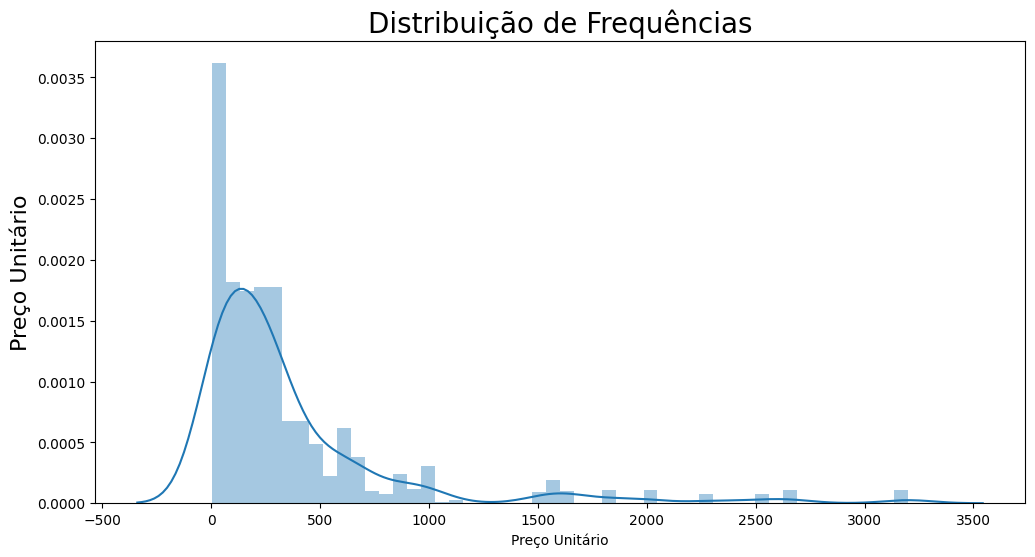

In [65]:
ax = sns.distplot(df['Preço Unitário'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Preço Unitário', fontsize=16)
ax

## Pré-Processamento

Nossa base tem muitas variáveis categóricas, para isso, vamos realizar um pré-processamento dos dados e fazer uma base auxiliar para termos mais variáveis para realizarmos a análise de correlação entre elas.

In [66]:
base_auxiliar = df.copy()

lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
encoder = ['ID do Produto',
           'Nome do Produto',
           'Nome da Categoria',
           'Nome da Subcategoria',
           'Marca',
           'Tamanho',
           'Classe']

# Loop para conversão das colunas categóricas em númericas
for coluna in encoder:
    base_auxiliar[coluna] = lb.fit_transform(base_auxiliar[coluna])

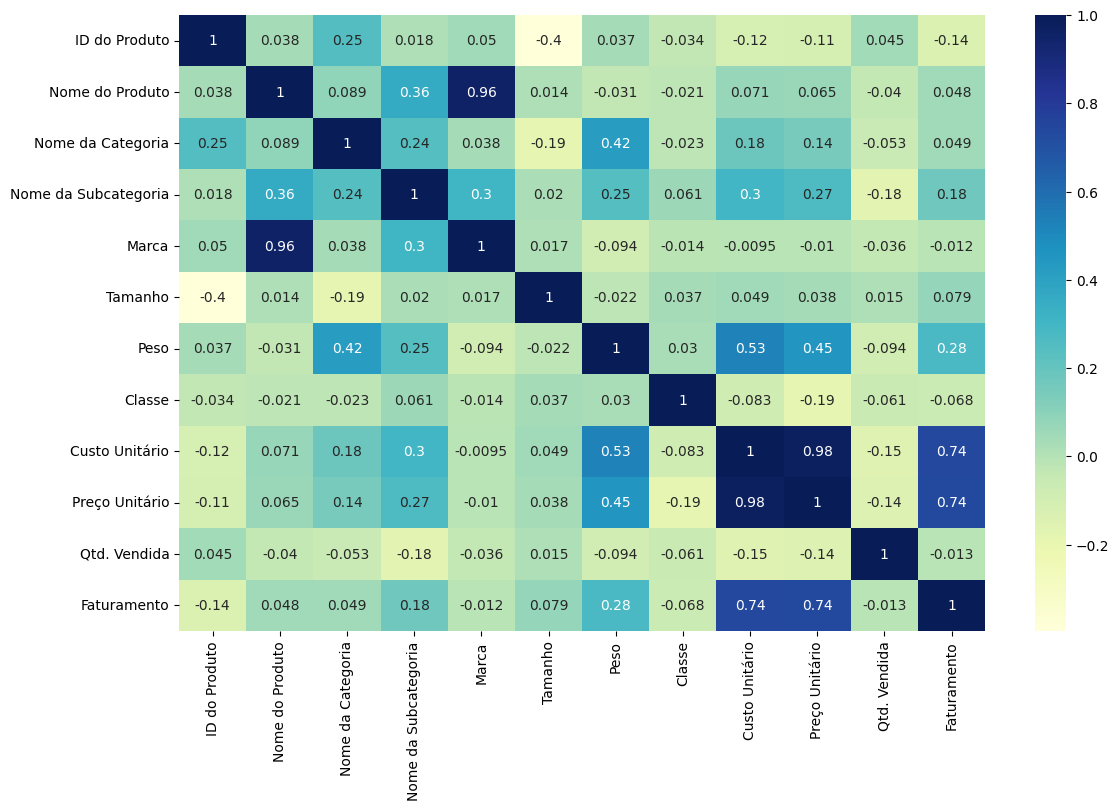

In [67]:
# Mostrando a correlação entre as variáveis
plt.figure(figsize=(13,8))
sns.heatmap(base_auxiliar.corr(),annot=True,cmap="YlGnBu")
plt.show()

## Modelagem

- **Regressão Linear Múltipla**

Aqui vamos tirar as variáveis com alta correlação com a nossa variável de preço

In [68]:
# Separando X e Y
X = base_auxiliar.drop(['Preço Unitário','Custo Unitário','Faturamento'],axis=1)
y = base_auxiliar['Preço Unitário']

In [69]:
# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [70]:
# Usando a regressão linear
reg = LinearRegression().fit(X_train,y_train)

In [71]:
# Visualizando o coeficiente angular
reg.coef_

array([-1.04124475e-01,  4.21948344e-01, -2.16784964e+01,  1.00147736e+01,
       -5.47723281e+01, -4.50346009e-02,  5.70598183e+00, -1.60714916e+02,
       -2.68472421e-02])

In [72]:
# e o coeficiente linear
reg.intercept_

441.7819444766567

In [73]:
# Avaliando o erro
y_pred = reg.predict(X_test)

print(mean_absolute_error(y_test,y_pred))
print(math.sqrt(mean_squared_error(y_test,y_pred)))

288.0507331706997
426.38050703537857
